<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/mechanics/assignments/RBDQuanserAero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg
import sympy
from sympy import symbols
from sympy import *

import plotly.graph_objects as go
import plotly.express as px
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from IPython.display import display, Math, Latex

In [ ]:
def convert(s):
    str1 = ""
    return(str1.join(s))

In [ ]:
def smplystr(bigone1):
  stre = ["L(t)", "phi(t)", "theta(t)","alpha(t)","gamma(t)", "sin", "cos", "Derivative(L(t), t)", "Derivative(L(t), (t, 2))", "Derivative(phi_1, t)", "Derivative(theta_1, t)", "Derivative(phi_1, (t, 2))", "Derivative(theta_1, (t, 2))", "Derivative(alpha_1, t)","Derivative(alpha_1, (t, 2))","Derivative(gamma_1, t)","Derivative(gamma_1, (t, 2))"]
  stre3 = ["L","phi_1", "theta_1","alpha_1","gamma_1", "np.sin", "np.cos", "dL", "ddL", "phi_2", "theta_2", "phi_3", "theta_3","alpha_2","alpha_3","gamma_2","gamma_3"]


  for n in range(0,len(stre)):
    stre1 = list(stre3[n])
    stre6 = stre[n]
    yui = len(stre[n])
    i = yui
    while i < len(bigone1):
      hjk = bigone1[i - yui:i]
      if hjk == stre6:
        bigone1 = list(bigone1)
        bigone1[i - yui:i] = stre1
        i = i - (yui - len(stre1)) +1
        bigone1 = convert(bigone1)
      else:
        i = i + 1
  return bigone1

In [ ]:
alpha_1, theta_1, phi_1, gamma_1 = dynamicsymbols("alpha, theta, phi,gamma")
init_vprinting
t = Symbol('t')
init_vprinting()

In [ ]:
theta_2 = theta_1.diff(t);theta_3 = theta_2.diff(t)
alpha_2 = alpha_1.diff(t);alpha_3 = alpha_2.diff(t)
gamma_2 = gamma_1.diff(t);gamma_3 = gamma_2.diff(t)
phi_2 = phi_1.diff(t);phi_3 = phi_2.diff(t)


R1_phi = Matrix([[1, 0, 0],[0, cos(phi_1), -sin(phi_1)],[0, sin(phi_1),cos(phi_1)]])
R3_alpha = Matrix([[cos(alpha_1),-sin(alpha_1),0],[sin(alpha_1),cos(alpha_1),0],[0,0,1]])
R1_gamma = Matrix([[1, 0, 0],[0, cos(gamma_1), -sin(gamma_1)],[0, sin(gamma_1),cos(gamma_1)]])
R3_theta = Matrix([[cos(theta_1),-sin(theta_1),0],[sin(theta_1),cos(theta_1),0],[0,0,1]])


l = symbols("l")

hatO = Matrix([[-l**2,0,0],[0,0,0],[0,0,-l**2]])
Q1 = Matrix([[phi_2],[0],[0]])
Q3 = Matrix([[0],[0],[theta_2]])
QJ = Matrix([[0],[0],[alpha_2]])
QK = Matrix([[gamma_2],[0],[0]])
dQJ = Matrix([[0],[0],[alpha_3]])
dQK = Matrix([[gamma_3],[0],[0]])
dQ1=Matrix([[phi_3],[0],[0]])
dQ3=Matrix([[0],[0],[theta_3]])

f_J,f_K,h = symbols("f_J,f_K,h")

OBc = Matrix([[0], [0], [h]])
hatOBc = Matrix([[-h**2,0,0],[0,-h**2,0],[0,0,0]])

FJ = Matrix([[0],[0],[f_J]])
FK = Matrix([[f_K],[0],[0]])

OJb = Matrix([[0],[l],[0]])
OKb =  Matrix([[0],[-l],[0]])

I_Jx,I_Jy,I_Jz =symbols("I_J(x:z)")
I_Kx,I_Ky,I_Kz =symbols("I_K(x:z)")
I_Bx,I_By,I_Bz =symbols("I_B(x:z)")
I_Cx,I_Cy,I_Cz =symbols("I_C(x:z)")

IK = Matrix([[I_Kx,0,0],[0,I_Ky,0],[0,0,I_Kz]])
IJ = Matrix([[I_Jx,0,0],[0,I_Jy,0],[0,0,I_Jz]])
IB = Matrix([[I_Bx,0,0],[0,I_By,0],[0,0,I_Bz]])
IC = Matrix([[I_Cx,0,0],[0,I_Cy,0],[0,0,I_Cz]])



M_J,M_K,M_B = symbols("M_J,M_K,M_B")
D_theta, D_phi ,T_2= symbols("D_theta, D_phi,T_2")
Tq = Matrix([[0],[T_2],[0]])
I_tB = R3_alpha@IJ - M_J*hatO + R1_gamma@IK - M_K*hatO + IB
I_tC = R1_phi@I_tB - (M_J + M_K + M_B)*hatOBc + IC
#rew = ((I_total@Q1).cross(Q1)) + R3_alpha@((IA@Q1).cross(QA)) + R1_gamma@((IB@Q1.cross(QB))) + (R1_phi.T@IP2@Q3).cross(Q3) + XB.cross(FB) + XA.cross(FA) + R3_alpha@((IA@QA).cross(QA) - IA@dQA) + R1_gamma@((IB@QB).cross(QB) - IB@dQB) - R1_phi.T@(D_theta*Q3) - D_phi*Q1
#rew = (I_tC@Q3).cross(Q3) + (R1_phi@I_tB@Q1).cross(Q3) + (R1_phi@(R3_alpha@IF@QF + R1_gamma@IG@QG)).cross(Q3) + R1_phi@((R3_alpha@IF@QF + R1_gamma@IG@QG).cross(Q1) + (I_tB@Q1).cross(Q1) - R3_alpha@(IF@dQF - (IF@QF).cross(QF)) - R1_gamma@(IG@dQG - (IG@QG).cross(QG)) + OGb.cross(FG) + OFb.cross(FF) - D_phi*Q1) + D_theta*Q3 + Tq


In [ ]:
IK = Matrix([[0, 0, I_Jz],[0, I_Jy, 0],[-I_Jx,0,0]])

In [ ]:
display(Eq(S('I_CJ'),IJ, evaluate = False))
print("#____________________________________#")

       ⎡I_Jx   0     0  ⎤
       ⎢                ⎥
I_CJ = ⎢ 0    I_Jy   0  ⎥
       ⎢                ⎥
       ⎣ 0     0    I_Jz⎦

#____________________________________#


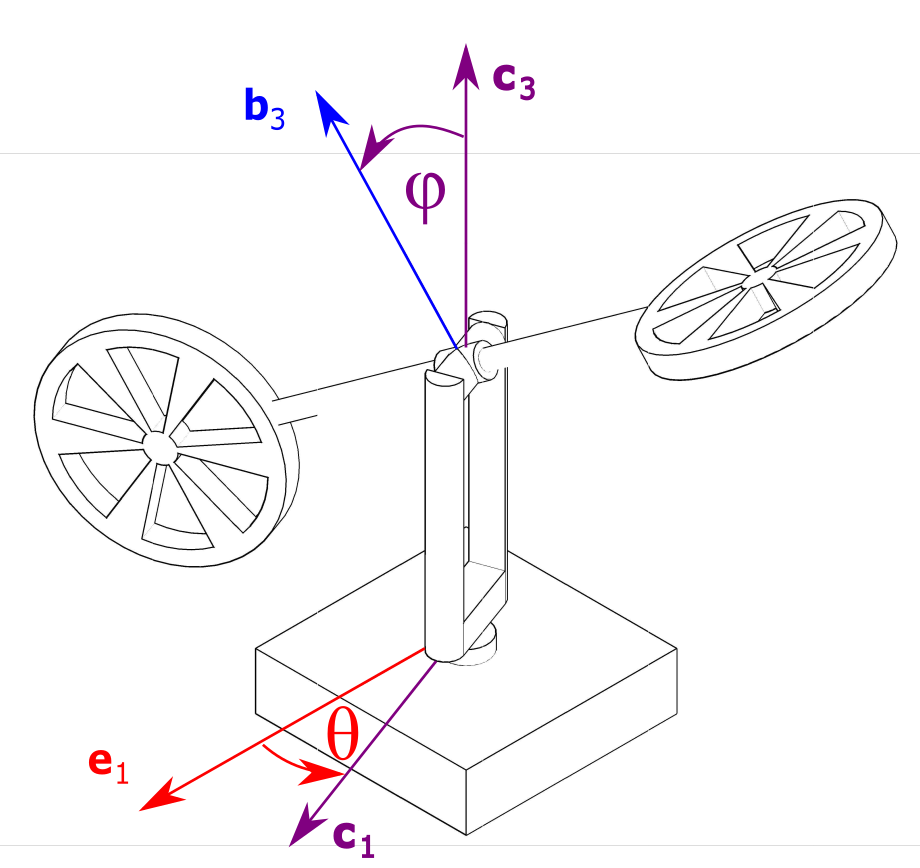

Let us take inertial frame as $\mathbf{e}$, which is fixed to body part E. And $\mathbf{O}$ as the original of the $\mathbf{e}$-frame. Let $\mathbf{c}$ be another orthongonal frame such that it moves with respect to $\mathbf{e}$ in such a way that $\mathbf{c}_3\equiv \mathbf{e}_3$ and $\mathbf{c}$-frame is always fixed to body part c. Therefore

\begin{align*}
\mathbf{c}=\mathbf{e}\,R_3(\theta)
\end{align*}

\begin{align*}
R_3(\theta)=\begin{bmatrix}
\cos{\theta}&-\sin{\theta}&0\\
\sin{\theta}&\cos{\theta}&0\\
0&0&1
\end{bmatrix}.
\end{align*}

Let $\mathbf{b}$ be another orthonomal frame such that it moves with respect to $\mathbf{c}$ in such a way that $\mathbf{b}_1\equiv \mathbf{c}_1$ and $\mathbf{b}$ is always fixed to body part $\mathbf{B}$.

\begin{align*}
\mathbf{b}=\mathbf{c}\,R_1(\phi)
\end{align*}

\begin{align*}
R_1(\phi)=\begin{bmatrix}
1&0&0\\
0&\cos{\phi}&-\sin{\phi}\\
0&\sin{\phi}&\cos{\phi}
\end{bmatrix}.
\end{align*}

Origin of $\mathbf{e}$-frame and $\mathbf{c}$-frame coincide with each other. Let's take B as the origin of $\mathbf{b}$-frame. Then

\begin{align*}
\mathbf{OB}=\mathbf{c}\mathbf{O}_{Bc}\
\end{align*}

\begin{align*}
\mathbf{O}_{BC}&=\begin{bmatrix}
0\\0\\h
\end{bmatrix},
\end{align*}

Let $\mathbf{j}$ be another orthonomal frame such that, it moves with respect to $\mathbf{b}$ in a such a way that, $\mathbf{b}_3\equiv \mathbf{j}_3$ and $\mathbf{j}$ is always fixed to Propeller $\mathbf{J}$. Origin point of $\mathbf{j}$ frame is $\mathbf{J}$.

\begin{align*}
\mathbf{BJ}=\mathbf{b}\mathbf{O}_{Jb}\
\end{align*}

\begin{align*}
\mathbf{O}_{Jb}&=\begin{bmatrix}
0\\d\\0
\end{bmatrix},
\end{align*}

Let $\mathbf{k}$ be another othonomal frame such that, it moves with respect to  $\mathbf{b}$ in a such a way that, $\mathbf{b}_1\equiv \mathbf{k}_1$ and $\mathbf{k}$ is always fixed to Propeller $\mathbf{K}$. Origin point of $\mathbf{k}$ frame is $\mathbf{K}$.

\begin{align*}
\mathbf{BK}=\mathbf{b}\mathbf{O}_{Kb}\
\end{align*}

\begin{align*}
\mathbf{O}_{Kb}&=\begin{bmatrix}
0\\-d\\0
\end{bmatrix},
\end{align*}

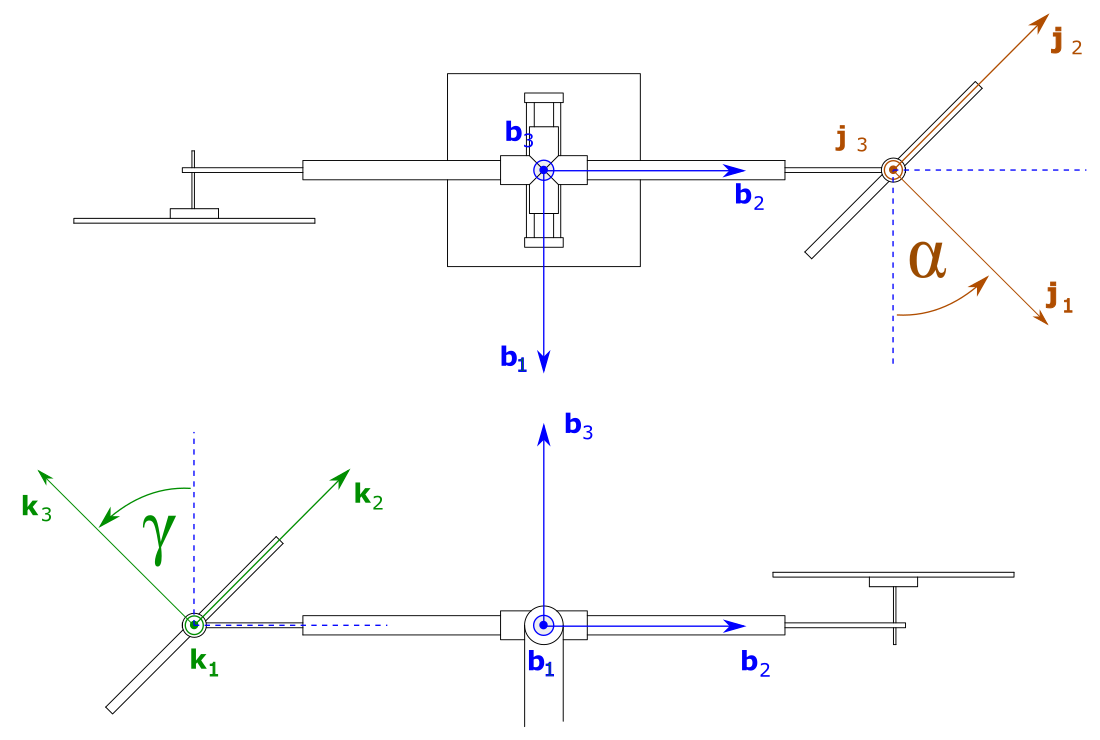

Angular momentum of propeller $\mathbf{J}$ in b frame about $\mathbf{J}$ point.\
Assumptions,

*   Centre of mass in propeller $\mathbf{J}$ coincide with origin of $\mathbf{j}$-frame

\begin{align*}
\mathbf{\bar{X}_{CJ}}&=\mathbf{0}\\
\mathbb{I}&=\mathbb{I}_{CJ}
\end{align*}

* Rigid Body $\mathbf{J}$ pinned at $\mathbf{J}$ point to the $\mathbf{b}$-frame.

\begin{align*}
\dot{o}_{Jb}&={0}
\end{align*}

Rotated angle of Rigid Body $\mathbf{J}$ with respect to $\mathbf{b}$-frame about $\mathbf{b}_{3}$ axis is $\mathbf{\alpha}$.

\begin{align}
\pi&= R\left(\mathbb{I}\Omega+M\bar{X}\times R^T\dot{o}\right)\\
\pi_{Jb}&= {R}_3({\alpha})\mathbb{I}_{CJ}\Omega_{J} = {R}_{3}({\alpha})({\Pi}_{Jj})_{around \mathbf{J}}......................(1)\\
\mathbf{\Omega}_{J}&=\begin{bmatrix}
0\\0\\\dot{\alpha}
\end{bmatrix},\\
\dot{\pi}_{Jb}&=R_3({\alpha})\left(\mathbb{I}_{CJ}\dot{\Omega}_{J}-\mathbb{I}_{CJ}{\Omega}_{J}\times \Omega_{J}\right)=\tau_J^b.........................(2)
\end{align}





For simplicity of calculation, We take
\begin{align}
R_3(\alpha) = I_{3\times 3}\\
R_1(\gamma) = I_{3\times 3}
\end{align}

In [ ]:
R3_alpha = Matrix([[1,0,0],[0,1,0],[0,0,1]])
R1_gamma = Matrix([[1, 0, 0],[0, 1, 0],[0,0,1]])

In [ ]:
pi_Jb,tau_j = dynamicsymbols("pi_Jb,tau_J^b")
dpi_Jb = pi_Jb.diff(t)
pijb = R3_alpha@IJ@QJ
display(Eq(pi_Jb,pijb, evaluate = False))
print("____________________________________(1)")
print("                                      ")
tauj = R3_theta@(IJ@dQJ - (IJ@QJ).cross(QJ))
display(Eq(tauj,tau_j, evaluate = False))
print("____________________________________(2)")
print("                                      ")
I_ck = Symbol('\mathbb{I}_{CK}')
display(Eq(I_ck,IK, evaluate = False))

       ⎡  0   ⎤
       ⎢      ⎥
π_Jb = ⎢  0   ⎥
       ⎢      ⎥
       ⎣I_Jz⋅α̇⎦

____________________________________(1)
                                      


⎡  0   ⎤         
⎢      ⎥         
⎢  0   ⎥ = τ_J__b
⎢      ⎥         
⎣I_Jz⋅α̈⎦         

____________________________________(2)
                                      


                  ⎡I_Kx   0     0  ⎤
                  ⎢                ⎥
\mathbb{I}_{CK} = ⎢ 0    I_Ky   0  ⎥
                  ⎢                ⎥
                  ⎣ 0     0    I_Kz⎦

Angular momentum of propeller $\mathbf{K}$ in $\mathbf{b}$-frame about $\mathbf{K}$ point.

Assumption,

\begin{align*}
\mathbf{\bar{X}_{CK}}&=\mathbf{0}\\
\mathbb{I}&=\mathbb{I}_{CK}
\end{align*}

\begin{align*}
\dot{o}_{Kb}&={0}
\end{align*}

Rotated angle of Rigid Body $\mathbf{K}$ with respect to $\mathbf{b}$-frame about $\mathbf{b}_{1}$ axis is $\mathbf{\gamma}$.

\begin{align}
\pi&= R\left(\mathbb{I}\Omega+M\bar{X}\times R^T\dot{o}\right)\\
\pi_{Kb}&= {R}_1({\gamma})\mathbb{I}_{CK}\Omega_{K} = {R}_{1}({\gamma})({\Pi}_{Kk})_{around \mathbf{K}}............................(3)\\
\mathbf{\Omega}_{K}&=\begin{bmatrix}
\dot{\gamma}\\0\\0
\end{bmatrix},\\
\dot{\pi}_{Kb}&=R_1({\gamma})\left(\mathbb{I}_{CK}\dot{\Omega}_{K}-\mathbb{I}_{CK}{\Omega}_{K}\times \Omega_{K}\right)=\tau_K^b.............................(4)
\end{align}

In [ ]:
pi_Kb,tau_k = dynamicsymbols("pi_Kb,tau_K^b")
dpi_Kb = pi_Kb.diff(t)
pikb = R1_gamma@IK@QK
display(Eq(pi_Kb,pikb, evaluate = False))
print("____________________________________(3)")
print("                                      ")
tauk = R1_gamma@(IK@dQK - (IK@QK).cross(QK))
display(Eq(tauk,tau_k, evaluate = False))
print("____________________________________(4)")
print("                                      ")


       ⎡I_Kx⋅γ̇⎤
       ⎢      ⎥
π_Kb = ⎢  0   ⎥
       ⎢      ⎥
       ⎣  0   ⎦

____________________________________(3)
                                      


⎡I_Kx⋅γ̈⎤         
⎢      ⎥         
⎢  0   ⎥ = τ_K__b
⎢      ⎥         
⎣  0   ⎦         

____________________________________(4)
                                      


Angular momentum of propeller $\mathbf{J}$ in $\mathbf{b}$-frame about $\mathbf{B}$.

from $\mathbb{I}_c\triangleq (\mathbb{I}+M\widehat{\bar{X}}^2)$,

\begin{align}
\mathbb{I}_{JB}&={R}_{3}({\alpha})\mathbb{I}_{CJ} - {M}_{J}\widehat{O}_{Jb}^2......................(5)\\
({\Pi}_{Jb})_{around \mathbf{B}}&=\mathbb{I}_{JB}\Omega_1(\phi)\\
({\Pi}_{Jb})_{around \mathbf{B}}&=\left({R}_{3}({\alpha})\mathbb{I}_{CJ} - {M}_{J}\widehat{O}_{Jb}^2\right){\Omega}_1(\phi)............................(6)
\end{align}

\begin{align}
\mathbf{\Omega}_1({\phi})&=\begin{bmatrix}
\dot{\phi}\\0\\0
\end{bmatrix}
\end{align}

\begin{align*}
\widehat{O}_{Jb}^2=-{l}^2\begin{bmatrix}
1&0&0\\
0&0&0\\
0&0&1
\end{bmatrix}.
\end{align*}



In [ ]:
#@title
#@title
#@title  { vertical-output: true, display-mode: "form" }
variable_name = ""
Ijb = R3_alpha@IJ - M_J*hatO
PijbaB = Ijb@Q1
I_JB = Symbol('\mathbb{I}_{JB}')
PijbaroundB = Symbol('(\Pi_{Jb})_{around \mathbf{B}}')
display(Eq(I_JB,Ijb, evaluate = False))
print("                       ____________________________________(5)")
print("                                      ")
display(Eq(PijbaroundB,PijbaB, evaluate = False))
print("    ____________________________________(6)")
print("                                      ")

                  ⎡            2                     ⎤
                  ⎢I_Jx + M_J⋅l    0          0      ⎥
                  ⎢                                  ⎥
\mathbb{I}_{JB} = ⎢      0        I_Jy        0      ⎥
                  ⎢                                  ⎥
                  ⎢                                 2⎥
                  ⎣      0         0    I_Jz + M_J⋅l ⎦

                       ____________________________________(5)
                                      


                                 ⎡⎛            2⎞  ⎤
                                 ⎢⎝I_Jx + M_J⋅l ⎠⋅φ̇⎥
                                 ⎢                 ⎥
(\Pi_{Jb})_{around \mathbf{B}} = ⎢        0        ⎥
                                 ⎢                 ⎥
                                 ⎣        0        ⎦

    ____________________________________(6)
                                      


Angular momentum of propeller $\mathbf{K}$ in $\mathbf{b}$-frame about $\mathbf{B}$.

\begin{align}
\mathbb{I}_{KB}&={R}_{1}({\gamma})\mathbb{I}_{CK} - {M}_{K}\widehat{O}_{Kb}^2..........................(7)\\
({\Pi}_{Kb})_{around \mathbf{B}}&=\mathbb{I}_{KB}\Omega_1(\phi)\\
({\Pi}_{Kb})_{around \mathbf{B}}&=\left({R}_{1}({\gamma})\mathbb{I}_{CK} - {M}_{K}\widehat{O}_{Kb}^2\right){\Omega}_1(\phi).............................(8)
\end{align}



\begin{align*}
\widehat{O}_{Kb}^2=-{l}^2\begin{bmatrix}
1&0&0\\
0&0&0\\
0&0&1
\end{bmatrix}.
\end{align*}

In [ ]:
#@title
Ikb = R1_gamma@IK - M_K*hatO
PikbaB = Ikb@Q1
I_KB = Symbol('\mathbb{I}_{KB}')
PikbaroundB = Symbol('(\Pi_{Kb})_{around \mathbf{B}}')
display(Eq(I_KB,Ikb, evaluate = False))
print("                       ____________________________________(7)")
print("                                      ")
display(Eq(PikbaroundB,PikbaB, evaluate = False))
print("    ____________________________________(8)")
print("                                      ")

                  ⎡            2                     ⎤
                  ⎢I_Kx + M_K⋅l    0          0      ⎥
                  ⎢                                  ⎥
\mathbb{I}_{KB} = ⎢      0        I_Ky        0      ⎥
                  ⎢                                  ⎥
                  ⎢                                 2⎥
                  ⎣      0         0    I_Kz + M_K⋅l ⎦

                       ____________________________________(7)
                                      


                                 ⎡⎛            2⎞  ⎤
                                 ⎢⎝I_Kx + M_K⋅l ⎠⋅φ̇⎥
                                 ⎢                 ⎥
(\Pi_{Kb})_{around \mathbf{B}} = ⎢        0        ⎥
                                 ⎢                 ⎥
                                 ⎣        0        ⎦

    ____________________________________(8)
                                      


Total angular momentum of $\mathbf{K}$ in $\mathbf{b}$-frame, from equation $\mathbf{(1)}$ and $\mathbf{(6)}$.

\begin{align}
\Pi_{Jb}&=({\Pi}_{Jb})_{around \mathbf{B}}+{R}_{3}({\alpha})({\Pi}_{Jj})_{around \mathbf{J}}\\
\Pi_{Jb}&=\left({R}_{3}({\alpha})\mathbb{I}_{CJ} - {M}_{J}\widehat{O}_{Jb}^2\right){\Omega}_1(\phi) + {R}_{3}({\alpha})\mathbb{I}_{CJ}\Omega_{J}.....................(9)
\end{align}

Total angular momentum of $\mathbf{K}$ in $\mathbf{b}$-frame, from equation $\mathbf{(3)}$ and $\mathbf{(8)}$.

\begin{align}
\Pi_{Kb}&=\left({R}_{1}({\gamma})\mathbb{I}_{CK} - {M}_{K}\widehat{O}_{Kb}^2\right){\Omega}_1(\phi) + {R}_{1}({\gamma})\mathbb{I}_{CK}\Omega_{K}.....................(10)
\end{align}

In [ ]:
#@title
Pi_Jb = Symbol('\Pi_{Jb}')
PiJb = PijbaB + pijb
Pi_Kb = Symbol('\Pi_{Kb}')
PiKb = PikbaB + pikb
display(Eq(Pi_Jb,PiJb, evaluate = False))
print("                       ____________________________________(9)")
print("                                      ")
display(Eq(Pi_Kb,PiKb, evaluate = False))
print("                       ____________________________________(10)")
print("                                      ")

           ⎡⎛            2⎞  ⎤
           ⎢⎝I_Jx + M_J⋅l ⎠⋅φ̇⎥
           ⎢                 ⎥
\Pi_{Jb} = ⎢        0        ⎥
           ⎢                 ⎥
           ⎣     I_Jz⋅α̇      ⎦

                       ____________________________________(9)
                                      


           ⎡         ⎛            2⎞  ⎤
           ⎢I_Kx⋅γ̇ + ⎝I_Kx + M_K⋅l ⎠⋅φ̇⎥
           ⎢                          ⎥
\Pi_{Kb} = ⎢            0             ⎥
           ⎢                          ⎥
           ⎣            0             ⎦

                       ____________________________________(10)
                                      


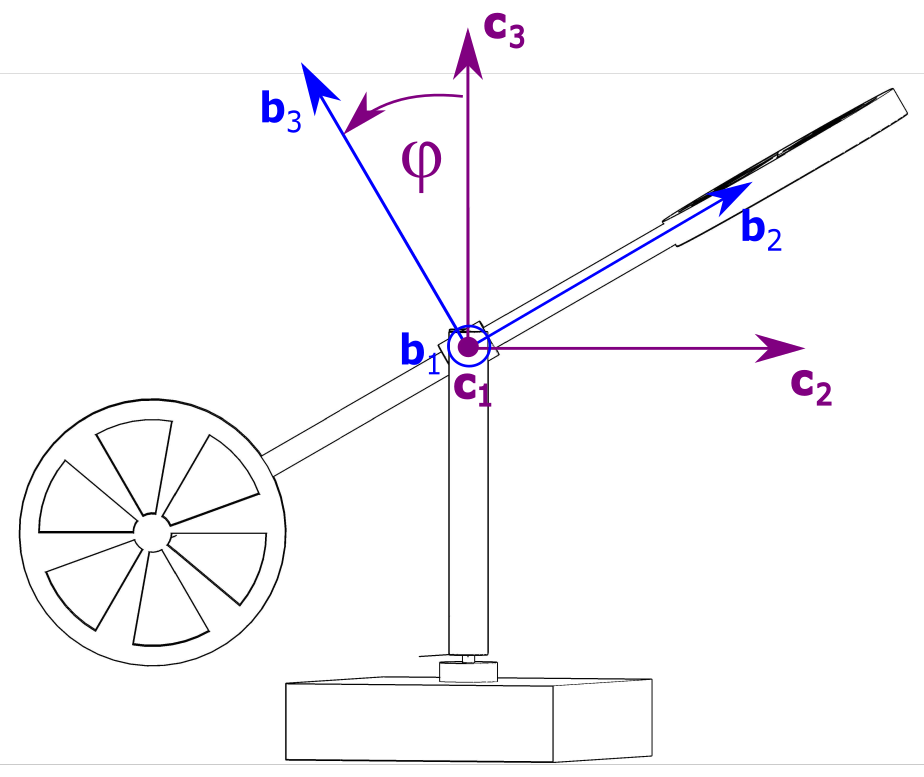

Total angular momentum of Rigid Body $\mathbf{J,K}$ and $\mathbf{B}$ in $\mathbf{b}$-frame, from equation $\mathbf{(9)}$ and $\mathbf{(10)}$.

\begin{align}
\Pi_{(J,K,B)b}&=\Pi_{Jb}+ \Pi_{Kb} + \mathbb{I}_{CB}\Omega_1({\phi})...............(11)
\end{align}

Total Angular momentum of inertia of Rigid Body $\mathbf{J,K}$ and $\mathbf{B}$ about origin of $\mathbf{b}$-frame,from equation $\mathbf{(5)}$ and $\mathbf{(7)}$.
\begin{align}
\mathbb{I}_{(J,K,B)around\mathbf{B}}&=\mathbb{I}_{JB} + \mathbb{I}_{KB} + \mathbb{I}_{B}...............(12)\\
\mathbb{I}_{(J,K,B)around\mathbf{B}}&={R}_{3}({\alpha})\mathbb{I}_{CJ} - {M}_{J}\widehat{O}_{Jb}^2 + {R}_{1}({\gamma})\mathbb{I}_{CK} - {M}_{K}\widehat{O}_{Kb}^2 + \mathbb{I}_{CB}
\end{align}

Assumption,

*   Centre of body mass of $\mathbf{B}$ coincide with origin of $\mathbf{b}$-frame.

\begin{align}
\mathbb{I}_B&=\mathbb{I}_{CB}
\end{align}




In [ ]:
#@title
Pi_JKBinb = Symbol('\Pi_{(J,K,B)b}')
PiJKBinb = PiJb + PiKb + IB@Q1
I_JKBinb = Symbol('\mathbb{I}_{(J,K,B)around \mathbf{B}}')
IJKBinb = Ijb + Ikb + IB
eq0 = [Eq(Pi_JKBinb,PiJKBinb, evaluate = False), Math(r'\text{__________(1)}')]
display(Eq(Pi_JKBinb,PiJKBinb, evaluate = False))
print("                                          ____________________________________(11)")
print("                                      ")
display(Eq(I_JKBinb,IJKBinb, evaluate = False))
print("                   ______________________________________________________________________________________________________________________(12)")
print("                                      ")


                 ⎡                  ⎛            2⎞     ⎛            2⎞  ⎤
                 ⎢I_Bx⋅φ̇ + I_Kx⋅γ̇ + ⎝I_Jx + M_J⋅l ⎠⋅φ̇ + ⎝I_Kx + M_K⋅l ⎠⋅φ̇⎥
                 ⎢                                                       ⎥
\Pi_{(J,K,B)b} = ⎢                           0                           ⎥
                 ⎢                                                       ⎥
                 ⎣                        I_Jz⋅α̇                         ⎦

                                          ____________________________________(11)
                                      


                                        ⎡                          2        2 
                                        ⎢I_Bx + I_Jx + I_Kx + M_J⋅l  + M_K⋅l  
                                        ⎢                                     
\mathbb{I}_{(J,K,B)around \mathbf{B}} = ⎢                 0                   
                                        ⎢                                     
                                        ⎢                                     
                                        ⎣                 0                   

                                                         ⎤
         0                            0                  ⎥
                                                         ⎥
 I_By + I_Jy + I_Ky                   0                  ⎥
                                                         ⎥
                                               2        2⎥
         0           I_Bz + I_Jz + I_Kz + M_J⋅l  + M_K⋅l ⎦

                   ______________________________________________________________________________________________________________________(12)
                                      


Euler's Rigid Body Equations.

\begin{align}
\mathbb{I}_{(J,K,B)around\mathbf{B}}\dot{\Omega}_1({\phi})= \Pi_{(J,K,B)b}\times\Omega_1(\phi) - \tau_K^b - \tau_J^b - T_{BC} + O_{Jb}\times F_J + O_{Kb}\times F_K - D_{pitch}\Omega_1(\phi).........(13)\\
\end{align}



> $T_{BC}-$ Reaction torque from $\mathbf{C}$ to $\mathbf{B}$.

> $F_J-$  Thrust force acting on body $\mathbf{B}$ from Propeller $\mathbf{J}$.

> $F_K-$ Thrust force acting on body $\mathbf{B}$ from Propeller $\mathbf{K}$.

> $D_{pitch}-$ Damping on Pitch motion.









In [ ]:
O_Kb,O_Jb,F_J,F_K,T_2,T_CA = symbols('O_{Kb}, O_{Jb}, F_J, F_K, T_{2},T_{CA}')

eq1 =Eq(O_Kb,OKb, evaluate = False)
eq2 = Eq(O_Jb,OJb, evaluate = False)
eq3 = Eq(F_J,FJ,evaluate = False)
eq4 = Eq(F_K,FK, evaluate = False)
Tca = Matrix([[0],[T_2],[0]])
eq5 = Eq(T_CA,Tca, evaluate= False)
display(Math(rf'{sympy.latex(eq1)} , {sympy.latex(eq2)}, {sympy.latex(eq3)}, {sympy.latex(eq4)}, {sympy.latex(eq5)}'))

<IPython.core.display.Math object>

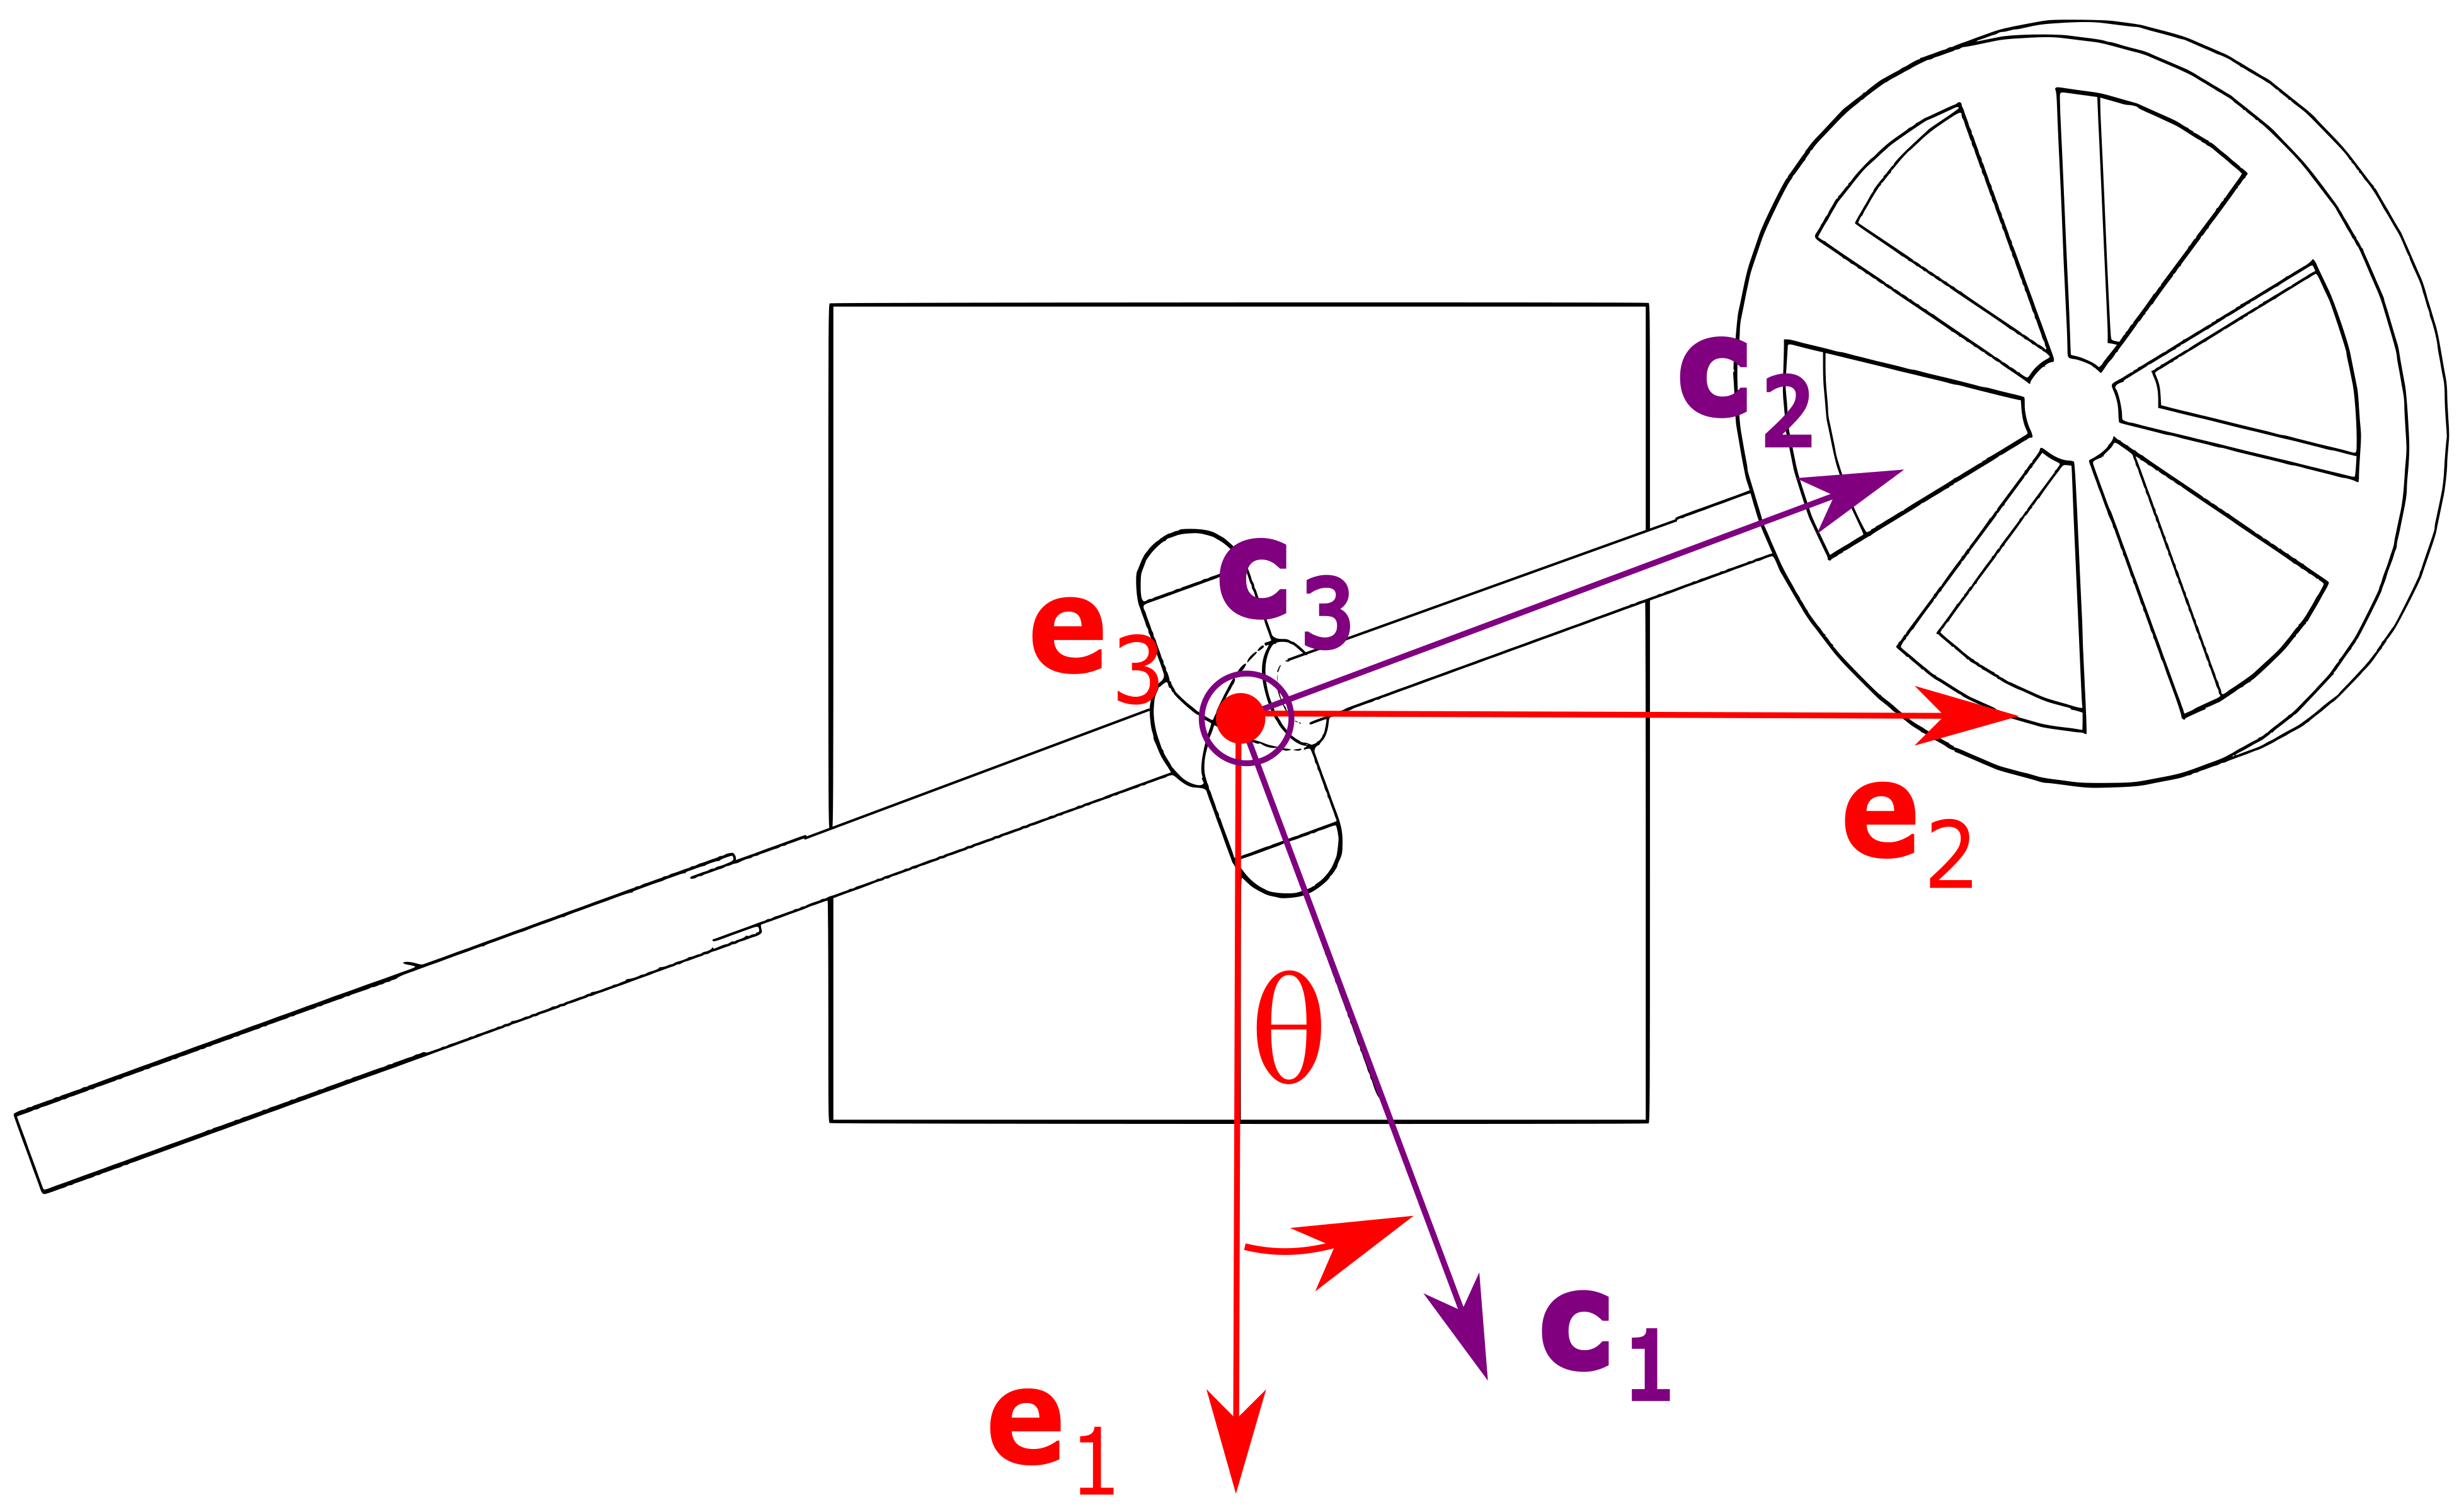

For Rigid Body $\mathbf{J,K,B}$ and $\mathbf{C}$ about point $\mathbf{O}$.

Total momentum o inertia about Point $\mathbf{O}$.

\begin{align}
\mathbb{I}_{(J,K,B,C)around \mathbf{O}}= R_1(\phi)\mathbb{I}_{(J,K,B)around \mathbf{B}} - M_{(J,K,B)}\widehat{O}_{Bc}^2 + \mathbb{I}_C.....................(14)
\end{align}

Total angular momentum of Rigid Body $\mathbf{J,K,B}$ and $\mathbf{C}$ in $\mathbf{c}-$frame.
\begin{align}
\Pi_{(J,K,B,C)c}= R_1(\phi)\Pi_{(J,K,B)b} + \left(\mathbb{I}_{(J,K,B,C)around \mathbf{O}}\right)\Omega_3(\theta).................(15)
\end{align}


In [ ]:
I_JKBCaO = Symbol('\mathbb{I}_{(J,K,B,C)around \mathbf{O}}')
IJKBCaO = R1_phi@IJKBinb - (M_J+M_K+M_B)*hatOBc + IC
Pi_JKBCinc = Symbol('\Pi_{(J,K,B,C)c}')
PiJKBCinc = R1_phi@PiJKBinb + IJKBCaO@Q3
tppl = {I_JKBCaO : IJKBCaO}
display(tppl)
print("                                      ")
display(Eq(Pi_JKBCinc,PiJKBCinc, evaluate = False))
print("                       __________________________________________________________________________________________________________________(15)")
print("                                      ")

⎧                                         ⎡                                 2 
⎪                                         ⎢I_Bx + I_Cx + I_Jx + I_Kx + M_J⋅l  
⎪                                         ⎢                                   
⎪                                         ⎢                                   
⎨\mathbb{I}_{(J,K,B,C)around \mathbf{O}}: ⎢                                0  
⎪                                         ⎢                                   
⎪                                         ⎢                                   
⎪                                         ⎣                                0  
⎩                                                                             

       2    2                                                                 
+ M_K⋅l  + h ⋅(M_B + M_J + M_K)                              0                
                                                                              
                                         2         

                   ⎡                          ⎛            2⎞     ⎛           
                   ⎢        I_Bx⋅φ̇ + I_Kx⋅γ̇ + ⎝I_Jx + M_J⋅l ⎠⋅φ̇ + ⎝I_Kx + M
                   ⎢                                                          
                   ⎢                     ⎛                          2        2
\Pi_{(J,K,B,C)c} = ⎢    -I_Jz⋅sin(φ)⋅α̇ - ⎝I_Bz + I_Jz + I_Kz + M_J⋅l  + M_K⋅l
                   ⎢                                                          
                   ⎢                ⎛       ⎛                          2      
                   ⎣I_Jz⋅cos(φ)⋅α̇ + ⎝I_Cz + ⎝I_Bz + I_Jz + I_Kz + M_J⋅l  + M_

 2⎞           ⎤
_K⋅l ⎠⋅φ̇         ⎥
              ⎥
⎞             ⎥
 ⎠⋅sin(φ)⋅θ̇    ⎥
              ⎥
  2⎞       ⎞  ⎥
K⋅l ⎠⋅cos(φ)⎠⋅θ̇⎦

                       __________________________________________________________________________________________________________________(15)
                                      



Euler,s Rigid Body Equations.

\begin{align}
\mathbb{I}_{(J,K,B,C)around \mathbf{O}}\dot{\Omega}_3(\theta)= \Pi_{(J,K,B,C)c}\times\Omega_3(\theta) + R_1(\phi)T_{BC} - D_{yaw}\Omega_3(\theta) + T_{CA}........................(16)
\end{align}



> $D_{yaw}-$ Damp on Rigid Body about yaw.

> $T_{CA}-$ Torque on Part $\mathbf{C}$ from $\mathbf{A}$(Stand platform).

from equation $\mathbf{(2),(4)}$ and $\mathbf{(13)}$.
\begin{align}
T_{BC}=-\mathbb{I}_{(J,K,B)around\mathbf{B}}\dot{\Omega}_1({\phi}) +\Pi_{(J,K,B)b}\times\Omega_1(\phi) - R_1({\gamma})\left(\mathbb{I}_{CK}\dot{\Omega}_{K}-\mathbb{I}_{CK}{\Omega}_{K}\times \Omega_{K}\right) - R_3({\alpha})\left(\mathbb{I}_{CJ}\dot{\Omega}_{J}-\mathbb{I}_{CJ}{\Omega}_{J}\times \Omega_{J}\right)  + O_{Jb}\times F_J + O_{Kb}\times F_K - D_{pitch}\Omega_1(\phi)......(17)\\
\end{align}








from equation $\mathbf{(16)}$ and $\mathbf{(17)}$.

\begin{align}
\mathbb{I}_{(J,K,B,C)around \mathbf{O}}\dot{\Omega}_3(\theta) +R_1(\phi)\mathbb{I}_{(J,K,B)around\mathbf{B}}\dot{\Omega}_1({\phi})= \Pi_{(J,K,B,C)c}\times\Omega_3(\theta) + R_1(\phi)\left( \Pi_{(J,K,B)b}\times\Omega_1(\phi) - R_1({\gamma})\left(\mathbb{I}_{CK}\dot{\Omega}_{K}-\mathbb{I}_{CK}{\Omega}_{K}\times \Omega_{K}\right) - R_3({\alpha})\left(\mathbb{I}_{CJ}\dot{\Omega}_{J}-\mathbb{I}_{CJ}{\Omega}_{J}\times \Omega_{J}\right)  + O_{Jb}\times F_J + O_{Kb}\times F_K - D_{pitch}\Omega_1(\phi)\right) - D_{yaw}\Omega_3(\theta) + T_{CA}
\end{align}

In [ ]:
LHS = IJKBCaO@dQ3 + R1_phi@(IJKBinb@dQ1)
RHS = PiJKBCinc.cross(Q3) + R1_phi@(PiJKBinb.cross(Q1) - R1_gamma@(IK@dQK - (IK@QK).cross(QK)) - R3_alpha@(IJ@dQJ - (IJ@QJ).cross(QJ)) + OJb.cross(FJ) + OKb.cross(FK) - D_phi*Q1) - D_theta*Q3 + Tca
lhs = simplify(LHS)
rhs = simplify(RHS)
display(Eq(S('RHS'),rhs, evaluate = False))
print("                                      ")
display(Eq(lhs,S('LHS'), evaluate = False))

      ⎡                                      ⎛         ⎛                      
      ⎢             -Dᵩ⋅φ̇ - I_Kx⋅γ̈ + f_J⋅l - ⎝I_Jz⋅α̇ + ⎝I_Bz + I_Jz + I_Kz 
      ⎢                                                                       
RHS = ⎢                                                    ⎛                  
      ⎢I_Jz⋅cos(φ)⋅α̇⋅φ̇ + T_{2} + (I_Jz⋅α̈ - f_K⋅l)⋅sin(φ) - ⎝I_Bx⋅φ̇ + I_Kx⋅
      ⎢                                                                       
      ⎣                            -Dₜₕₑₜₐ⋅θ̇ + I_Jz⋅sin(φ)⋅α̇⋅φ̇ + (-I_Jz⋅α̈ 

    2        2⎞  ⎞                      ⎤
+ M_J⋅l  + M_K⋅l ⎠⋅θ̇⎠⋅sin(φ)⋅θ̇             ⎥
                                        ⎥
⎛            2⎞     ⎛            2⎞  ⎞  ⎥
γ̇ + ⎝I_Jx + M_J⋅l ⎠⋅φ̇ + ⎝I_Kx + M_K⋅l ⎠⋅φ̇⎠⋅θ̇⎥
                                        ⎥
+ f_K⋅l)⋅cos(φ)                             ⎦

⎡        ⎛                          2        2⎞          ⎤      
⎢        ⎝I_Bx + I_Jx + I_Kx + M_J⋅l  + M_K⋅l ⎠⋅φ̈        ⎥      
⎢                                                        ⎥      
⎢     ⎛                          2        2⎞             ⎥      
⎢    -⎝I_Bz + I_Jz + I_Kz + M_J⋅l  + M_K⋅l ⎠⋅sin(φ)⋅θ̈    ⎥ = LHS
⎢                                                        ⎥      
⎢⎛       ⎛                          2        2⎞       ⎞  ⎥      
⎣⎝I_Cz + ⎝I_Bz + I_Jz + I_Kz + M_J⋅l  + M_K⋅l ⎠⋅cos(φ)⎠⋅θ̈⎦      

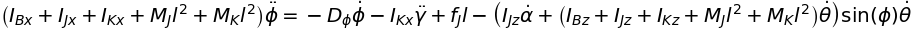

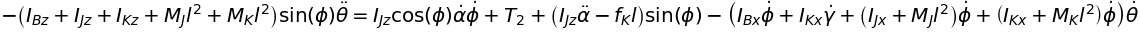

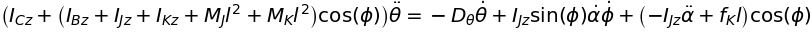

In [ ]:
eq6 = Eq(lhs[0],rhs[0])
display(eq6)
print("                                      ")
eq7 = Eq(lhs[1],rhs[1])
display(eq7)
print("                                      ")
eq8 = Eq(lhs[2],rhs[2])
display(eq8)
print("                                      ")

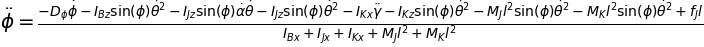

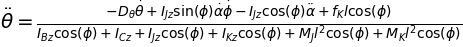

In [ ]:

result = solve([eq6,eq8],(phi_3,theta_3))
phi_31 = simplify(result[phi_3])
theta_31 = simplify(result[theta_3])
display(Eq(phi_3,phi_31, evaluate = False))
print("                             ")
display(Eq(theta_3,theta_31, evaluate = False))
print("                             ")

In [ ]:
print(theta_31)

(-D_phi*I_Jx*cos(phi(t))*Derivative(phi(t), t) - D_theta*I_Bx*Derivative(theta(t), t) - D_theta*I_Jx*Derivative(theta(t), t) - D_theta*M_J*l**2*Derivative(theta(t), t) - D_theta*M_K*l**2*Derivative(theta(t), t) - I_Bx*I_Jx*sin(phi(t))*Derivative(gamma(t), t)**2 - I_Bx*I_Jx*sin(phi(t))*Derivative(gamma(t), t)*Derivative(phi(t), t) - I_Bx*I_Jx*sin(phi(t))*Derivative(phi(t), t)**2 + I_Bx*I_Jx*cos(phi(t))*Derivative(gamma(t), (t, 2)) + I_Bx*I_Jz*sin(phi(t))*Derivative(alpha(t), t)*Derivative(phi(t), t) - I_Bx*I_Jz*cos(phi(t))*Derivative(alpha(t), (t, 2)) + I_Bx*f_K*l*cos(phi(t)) - I_Bz*I_Jx*sin(2*phi(t))*Derivative(theta(t), t)**2/2 - I_Jx**2*sin(phi(t))*Derivative(gamma(t), t)**2 - I_Jx**2*sin(phi(t))*Derivative(gamma(t), t)*Derivative(phi(t), t) - I_Jx**2*sin(phi(t))*Derivative(phi(t), t)**2 + I_Jx**2*sin(2*phi(t))*Derivative(gamma(t), t)*Derivative(theta(t), t)/2 + I_Jx**2*sin(2*phi(t))*Derivative(phi(t), t)*Derivative(theta(t), t)/2 + I_Jx**2*cos(phi(t))*Derivative(gamma(t), (t, 2)) + 

In [ ]:
strphi = "(-D_phi*Derivative(phi(t), t) - I_Bz*sin(phi(t))*Derivative(theta(t), t)**2 - I_Jz*sin(phi(t))*Derivative(alpha(t), t)*Derivative(theta(t), t) - I_Jz*sin(phi(t))*Derivative(theta(t), t)**2 - I_Kx*Derivative(gamma(t), (t, 2)) - I_Kz*sin(phi(t))*Derivative(theta(t), t)**2 - M_J*l**2*sin(phi(t))*Derivative(theta(t), t)**2 - M_K*l**2*sin(phi(t))*Derivative(theta(t), t)**2 + f_J*l)/(I_Bx + I_Jx + I_Kx + M_J*l**2 + M_K*l**2)"
strphi2 = smplystr(strphi);
print(strphi2)

(-D_phi*phi_2 - I_Bz*np.sin(phi_1)*theta_2**2 - I_Jz*np.sin(phi_1)*alpha_2*theta_2 - I_Jz*np.sin(phi_1)*theta_2**2 - I_Kx*gamma_3 - I_Kz*np.sin(phi_1)*theta_2**2 - M_J*l**2*np.sin(phi_1)*theta_2**2 - M_K*l**2*np.sin(phi_1)*theta_2**2 + f_J*l)/(I_Bx + I_Jx + I_Kx + M_J*l**2 + M_K*l**2)


In [ ]:
strtheta = "(-D_theta*Derivative(theta(t), t) + I_Jz*sin(phi(t))*Derivative(alpha(t), t)*Derivative(phi(t), t) - I_Jz*cos(phi(t))*Derivative(alpha(t), (t, 2)) + f_K*l*cos(phi(t)))/(I_Bz*cos(phi(t)) + I_Cz + I_Jz*cos(phi(t)) + I_Kz*cos(phi(t)) + M_J*l**2*cos(phi(t)) + M_K*l**2*cos(phi(t)))"
strtheta2 = smplystr(strtheta)
print(strtheta2)

(-D_theta*theta_2 + I_Jz*np.sin(phi_1)*alpha_2*phi_2 - I_Jz*np.cos(phi_1)*alpha_3 + f_K*l*np.cos(phi_1))/(I_Bz*np.cos(phi_1) + I_Cz + I_Jz*np.cos(phi_1) + I_Kz*np.cos(phi_1) + M_J*l**2*np.cos(phi_1) + M_K*l**2*np.cos(phi_1))


##Performance of Propellers

Thrust acting on propeller T,



> $k_T-$thrust coefficient

> $\rho-$Density of air

> ${n}-$ rev/s

> ${D}-$ propeller diameter

> $C_{pow}-$ power coefficient

> $u_0-$ propeller velocity

  > $J=\frac{u_0}{nD}$


\begin{align}
{T}&= {k}_{T}\rho{n}^2{D}^4
\end{align}

Torque acting on propeller Q,

\begin{align}
{Q}&=\frac{C_{pow}}{2\pi}\times \rho{n}^2{D}^5
\end{align}

In [ ]:
t = np.linspace(0, 1.24, int(1.24/0.01 + 1));
a0 =      -0.393;
a1 =      0.4638;
b1 =      0.6045;
a2 =       0.141;
b2 =     -0.2942;
a3 =    -0.08296;
b3 =    0.002544;
w =       1.689;

kt = [a0 + a1*cos(x*w) + b1*sin(x*w) + a2*cos(2*x*w) + b2*sin(2*x*w) + a3*cos(3*x*w) + b3*sin(3*x*w) for x in t];
kt = np.array(kt, dtype = "float");
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=kt, mode='lines', name='kt', marker=dict(color="blue")))
fig.update_layout(title="kt", xaxis=dict(title="J"),yaxis=dict(title="ratio"))

A0 =     0.02663;
A1 =     0.03871;
B1 =      0.0952;
A2 =     0.01961;
B2 =    -0.02179;
A3 =   -0.003766;
B3 =     -0.0073;
W =       2.534;

Cpow = [ A0 + A1*cos(x*W) + B1*sin(x*W) + A2*cos(2*x*W) + B2*sin(2*x*W) + A3*cos(3*x*W) + B3*sin(3*x*W) for x in t];
Cpow = np.array(Cpow, dtype = "float");
fig.add_trace(go.Scatter(x=t, y=Cpow, mode='lines', name='Cpow', marker=dict(color="red")))
fig.update_layout(title="", xaxis=dict(title="J"),yaxis=dict(title="ratio"))

##Velocities of propellers respect to initial frame

\begin{align}
x_J^e &= R_3(\theta)\left(O_{Bc} + R_1(\phi)X_J\right)\\
\dot{x}_J^e &= R_3(\theta)\left(\widehat{\Omega}_3(\theta)\left(O_{Bc} + R_1(\phi)X_J\right) + R_1(\phi)\widehat{\Omega}_1(\phi)X_J\right)\\
R_1^TR_3^T\dot{x}_J^e &= R_1^T(\phi)\left(\widehat{\Omega}_3(\theta)\left(O_{Bc} + R_1(\phi)X_J\right) + R_1(\phi)\widehat{\Omega}_1(\phi)X_J\right) = \dot{X}_J^e
\end{align}

         ⎡                   ⎛     2           2     ⎞                        
         ⎢                 l⋅⎝- sin (θ)⋅θ̇ - cos (θ)⋅θ̇⎠⋅cos(φ)               
         ⎢                                                                    
X_J_̇_e = ⎢                                  0                                
         ⎢                                                                    
         ⎢  ⎛   2           2     ⎞    2        ⎛   2           2     ⎞    2  
         ⎣l⋅⎝sin (φ)⋅φ̇ + cos (φ)⋅φ̇⎠⋅sin (φ) + l⋅⎝sin (φ)⋅φ̇ + cos (φ)⋅φ̇⎠⋅co

 ⎤
   ⎥
 ⎥
  ⎥
 ⎥
 ⎥
s (φ)⎦

         ⎡                     ⎛     2           2     ⎞                      
         ⎢                  -l⋅⎝- sin (θ)⋅θ̇ - cos (θ)⋅θ̇⎠⋅cos(φ)             
         ⎢                                                                    
X_K_̇_e = ⎢                                   0                               
         ⎢                                                                    
         ⎢    ⎛   2           2     ⎞    2        ⎛   2           2     ⎞    2
         ⎣- l⋅⎝sin (φ)⋅φ̇ + cos (φ)⋅φ̇⎠⋅sin (φ) - l⋅⎝sin (φ)⋅φ̇ + cos (φ)⋅φ̇⎠⋅

   ⎤
     ⎥
   ⎥
    ⎥
   ⎥
   ⎥
cos (φ)⎦

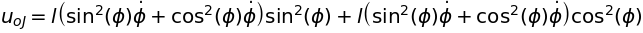

In [ ]:
X_je = dynamicsymbols('X_J^e');
dX_je = X_je.diff(t);
X_ke = dynamicsymbols('X_K^e');
dX_ke = X_ke.diff(t);
Omegaphi = R1_phi.T@(R1_phi.diff(t));
Omegatheta = R3_theta.T@(R3_theta.diff(t));
dX_Je = R1_phi.T@((Omegatheta@(OBc + R1_phi@OJb)) + R1_phi@Omegaphi@OJb);
dX_Ke = R1_phi.T@((Omegatheta@(OBc + R1_phi@OKb)) + R1_phi@Omegaphi@OKb);
display(Eq(dX_je,dX_Je, evaluate = False));
print("                                      ");
display(Eq(dX_ke,dX_Ke, evaluate = False));
print("                                      ");
u_oJ,u_oK = symbols('u_{oJ}, u_{oK}');
display(Eq(u_oJ,dX_Je[2], evaluate = False));
print("                                      ");
display(Eq(u_oK,dX_Ke[0], evaluate = False));
print("                                      ");

In [ ]:
print(dX_Ke[0])

-l*(-sin(theta(t))**2*Derivative(theta(t), t) - cos(theta(t))**2*Derivative(theta(t), t))*cos(phi(t))


In [ ]:
strdX_je= "l*(sin(phi(t))**2*Derivative(phi(t), t) + cos(phi(t))**2*Derivative(phi(t), t))*sin(phi(t))**2 + l*(sin(phi(t))**2*Derivative(phi(t), t) + cos(phi(t))**2*Derivative(phi(t), t))*cos(phi(t))**2"
strdX_Ke= "-l*(-sin(theta(t))**2*Derivative(theta(t), t) - cos(theta(t))**2*Derivative(theta(t), t))*cos(phi(t))"
print(smplystr(strdX_je))
print("                                      ");
print(smplystr(strdX_Ke))

l*(np.sin(phi_1)**2*phi_2 + np.cos(phi_1)**2*phi_2)*np.sin(phi_1)**2 + l*(np.sin(phi_1)**2*phi_2 + np.cos(phi_1)**2*phi_2)*np.cos(phi_1)**2
                                      
-l*(-np.sin(theta_1)**2*theta_2 - np.cos(theta_1)**2*theta_2)*np.cos(phi_1)


##Numerical Simulation

Input Voltage for 2 motors.

In [ ]:
T = 2; dT = 0.0001;
timrange = np.arange(0,T,dT);
voltage1 = 15*np.ones((10000, ),dtype=int);
voltage2 = np.zeros((5000,), dtype=int);
voltage22 = -15*np.ones((5000,), dtype=int);
voltage23 = -1*voltage22;
voltage3 = -15*np.ones((10000, ),dtype=int);
voltage = np.concatenate((voltage1, voltage3));
voltagef_k = np.zeros((20000, ),dtype=int)
fig = go.Figure()
fig.add_trace(go.Scatter(x=timrange, y=voltage, mode='lines', name='$V_{in}\\text{ of J motor}$', marker=dict(color="blue")))
Voltage = np.concatenate((voltage2, voltage22,voltage23,voltage2));
fig.add_trace(go.Scatter(x=timrange, y=Voltage, mode='lines', name='$V_{in}\\text{ of K motor}$', marker=dict(color="red")))
fig.update_layout(title='$\\text{Input Voltages to Motors} $',xaxis=dict(title="$\\text{Time\\ } s$"),yaxis=dict(title="$V$"))

In [ ]:
D_phi = 0.2; phi_2 = 0; gamma_3arr = np.array([], dtype='float'); I_Cz = 0.1; theta_2 = 0; phi_1 = 0;
I_Jx = 0.000025; alpha_1 = 0; I_Kx = 0.000025; I_Kz = 0.000025; I_Bx = 0.0219; M_J = 0.2; M_K = 0.2; l = 0.25; D_theta = 0.1; I_Jz = 0.000025; alpha_3arr = np.array([], dtype='float');
phi_1arr = np.array([0], dtype='float'); phi_2arr = np.array([0], dtype='float'); phi_3 = 0; theta_1arr = np.array([0], dtype='float'); theta_2arr = np.array([0],dtype='float');
phi_3arr = np.array([], dtype='float'); theta_3arr = np.array([], dtype='float');theta_1 = 0; I_Cz = 0.02;L = 0.000232;
theta_3 = 0; I_Bz = 0.0219; b = 0.00; J = 0.000025; rov = 1.18; D = 0.1778; Kt = 0.02416; Ke = 0.02416;R = 2.17;
Xarr = np.array([], dtype='float');
xn = np.array([[0, 0, 0, 0, 0, 0, 0, 0]], dtype='float');
Xarr = np.append(Xarr, xn[0], axis=0);
Xn = np.transpose(xn);
dX = np.array([[1, dT, 0, 0, 0, 0, 0, 0],[0, 1, 0, 0, 0, 0, 0, 0],[0, 0, 1, dT, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0],[0, 0, 0, 0, (-Ke*dT)/L, 0, (-R*dT)/L + 1, 0],[0, 0, 0, 0, 0, (-Ke*dT)/L, 0, (-R*dT)/L + 1]], dtype='float');
cvd = dX@Xn;
for i in range(int(T/dT) ):
  uoJ = l*(np.sin(Xn[2][0])**2*Xn[3][0] + np.cos(Xn[2][0])**2*Xn[3][0])*np.sin(Xn[2][0])**2 + l*(np.sin(Xn[2][0])**2*Xn[3][0] + np.cos(Xn[2][0])**2*Xn[3][0])*np.cos(Xn[2][0])**2;
  Joj = (uoJ*2*np.pi*0.44704)/(Xn[4][0]*D);
  Cpowj =  0.081; #A0 + A1*cos(Joj*W) + B1*sin(Joj*W) + A2*cos(2*Joj*W) + B2*sin(2*Joj*W) + A3*cos(3*Joj*W) + B3*sin(3*Joj*W) ;
  ktj = 0; #a0 + a1*cos(Joj*w) + b1*sin(Joj*w) + a2*cos(2*Joj*w) + b2*sin(2*Joj*w) + a3*cos(3*Joj*w) + b3*sin(3*Joj*w) ;
  f_J = (ktj*rov*(Xn[4][0]**2)*D**4)/(2*np.pi)**2;
  Qj = (Cpowj*rov*(Xn[4][0]**2)*D**5)/(2*np.pi)**3;
  alpha_3 = (Kt*Xn[6][0])/J - (b*Xn[4][0])/J - ((Cpowj*rov*(Xn[4][0]*abs(Xn[4][0]))*(D**5))/(J*(2*np.pi)**3))
  uoK = -l*(-np.sin(Xn[0][0])**2*Xn[1] - np.cos(Xn[0][0])**2*Xn[1][0])*np.cos(Xn[2][0]);
  JoK = (uoK*2*np.pi*0.44704)/(Xn[5][0]*D);

  Cpowk = 0.081; #A0 + A1*cos(JoK*W) + B1*sin(JoK*W) + A2*cos(2*JoK*W) + B2*sin(2*JoK*W) + A3*cos(3*JoK*W) + B3*sin(3*JoK*W) ;
  ktk = 0; #a0 + a1*cos(JoK*w) + b1*sin(JoK*w) + a2*cos(2*JoK*w) + b2*sin(2*JoK*w) + a3*cos(3*JoK*w) + b3*sin(3*JoK*w) ;   0.128
  f_K = (ktk*rov*(Xn[5][0]**2)*D**4)/(2*np.pi)**2;
  Qk = (Cpowk*rov*(Xn[5][0]**2)*D**5)/(2*np.pi)**3;
  gamma_3 = (Kt*Xn[7][0])/J - (b*Xn[5][0])/J - ((Cpowk*rov*(Xn[5][0]*abs(Xn[5][0]))*(D**5))/(J*(2*np.pi)**3));
  theta_1 = Xn[0][0];theta_2 = Xn[1][0];phi_1 = Xn[2][0];phi_2 = Xn[3][0];alpha_2 = Xn[4][0];gamma_2 = Xn[5][0]
  dddX = np.array([[0],[dT*((-D_theta*theta_2 + I_Jz*np.sin(phi_1)*alpha_2*phi_2 - I_Jz*np.cos(phi_1)*alpha_3 + f_K*l*np.cos(phi_1))/(I_Bz*np.cos(phi_1) + I_Cz + I_Jz*np.cos(phi_1) + I_Kz*np.cos(phi_1) + M_J*l**2*np.cos(phi_1) + M_K*l**2*np.cos(phi_1)))],[0],[dT*((-D_phi*phi_2 - I_Bz*np.sin(phi_1)*theta_2**2 - I_Jz*np.sin(phi_1)*alpha_2*theta_2 - I_Jz*np.sin(phi_1)*theta_2**2 - I_Kx*gamma_3 - I_Kz*np.sin(phi_1)*theta_2**2 - M_J*l**2*np.sin(phi_1)*theta_2**2 - M_K*l**2*np.sin(phi_1)*theta_2**2 + f_J*l)/(I_Bx + I_Jx + I_Kx + M_J*l**2 + M_K*l**2))],[alpha_3*dT],[gamma_3*dT],[(voltagef_k[i]/L)*dT],[(Voltage[i]/L)*dT]], dtype='float');
  Xn1 = dX@Xn + dddX;
  Xn2 = np.transpose(Xn1);
  #print(Xn2)
  Xarr = np.vstack([Xarr,Xn2[0]])
  Xn = Xn1;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
fig1 = go.Figure()
disofteta = (180/np.pi)*Xarr[:,0];
fig1.add_trace(go.Scatter(x=timrange, y=disofteta, mode='lines', name='kt', marker=dict(color="blue")))
fig1.update_layout(title='$\\text{Displacement of  } \\theta$',xaxis=dict(title="$\\text{Time\\ } s$"),yaxis=dict(title="$\\theta$"))

In [ ]:
fig2 = go.Figure()
disofphi = (180/np.pi)*Xarr[:,2];
fig2.add_trace(go.Scatter(x=timrange, y= disofphi, mode='lines', name='kt', marker=dict(color="blue")))
fig2.update_layout(title='$\\text{Displacement of  } \\phi$',xaxis=dict(title="$\\text{Time\\ } s$"),yaxis=dict(title="$\\phi$"))